### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Now,load the data
diabetes_df=pd.read_csv('health care diabetes.csv')

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Perform Exploratory Data Analysis

### 1.Perform descriptive analysis. It is very important to understand the variables and corresponding values. We need to think through - Can minimum value of below listed columns be zero (0)? On these columns, a value of zero does not make sense and thus indicates missing value.
•Glucose
•BloodPressure
•SkinThickness
•Insulin
•BMI



In [4]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Now,check any missing values are available
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In this particular dataset, all the missing values were given the 0 as a value which is not good for the authenticity of the dataset. Hence we will first replace the 0 value with the NAN value then start the imputation process.

In [8]:
diabetes_df_copy = pd.DataFrame(diabetes_df)

In [9]:
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9
764,122.0,70.0,27.0,NaN,36.8
765,121.0,72.0,23.0,112.0,26.2
766,126.0,60.0,NaN,NaN,30.1


In [10]:
# Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### Data Visualization

### 2.Visually explore these variable, you may need to look for the distribution of these variables using histograms. Treat the missing values accordingly.

#####  Plotting the data distribution plots before removing null values

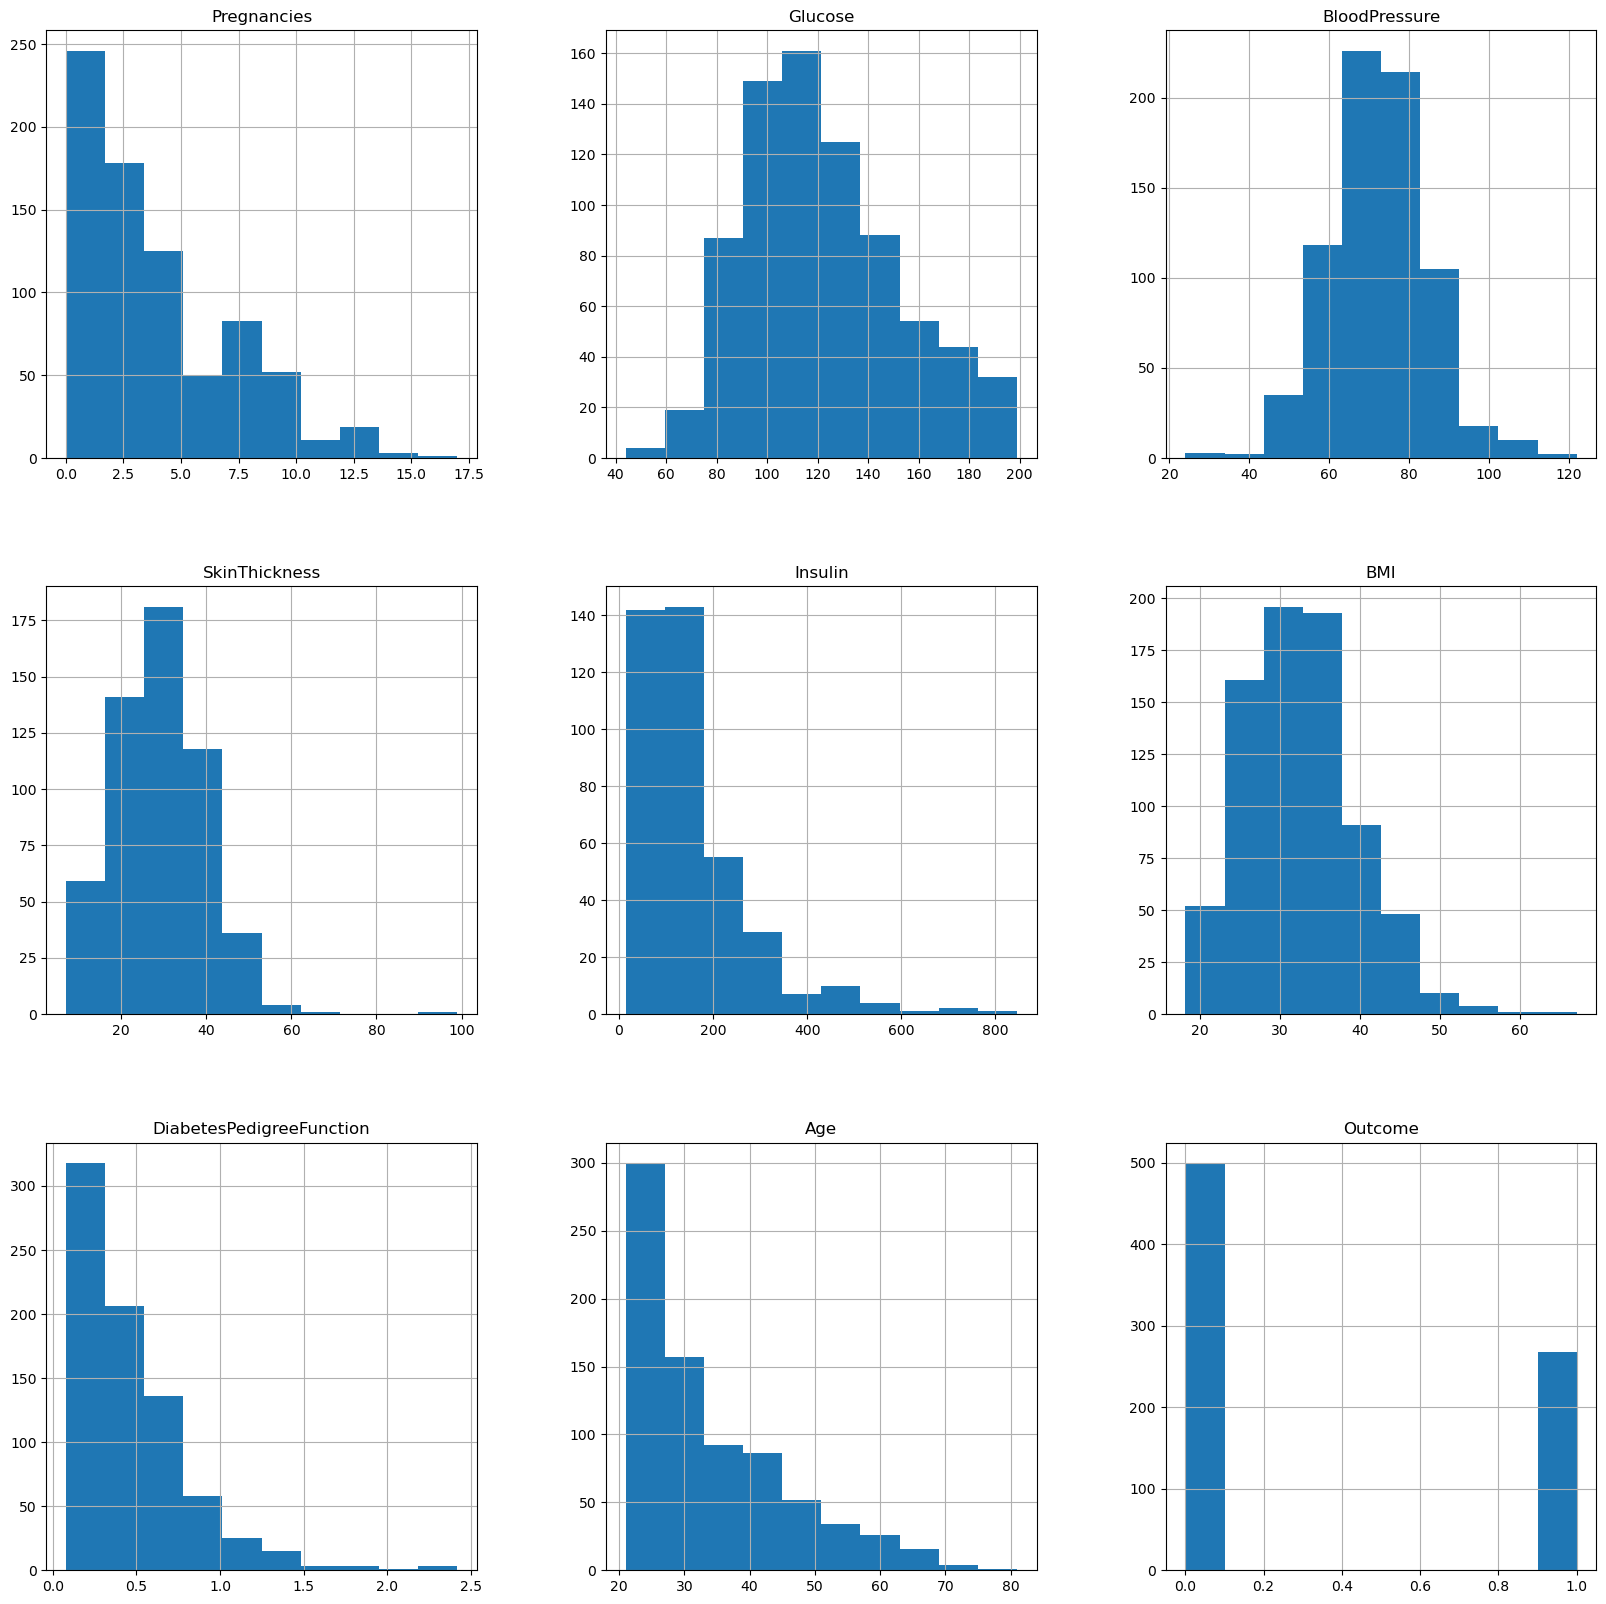

In [11]:
p = diabetes_df.hist(figsize = (20,20))

 Inference: So here we have seen the distribution of each features whether it is dependent data or independent data.it is the best way to start the analysis of the dataset as it shows the occurrence of every kind of value in the graphical structure which in turn lets us know the range of the data.

#### Missing value treatment

In [17]:
# Now we will be imputing the mean value of the column to each missing value of that particular column.
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(),inplace=True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(),inplace=True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].mean(),inplace=True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].mean(),inplace=True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].mean(),inplace=True)

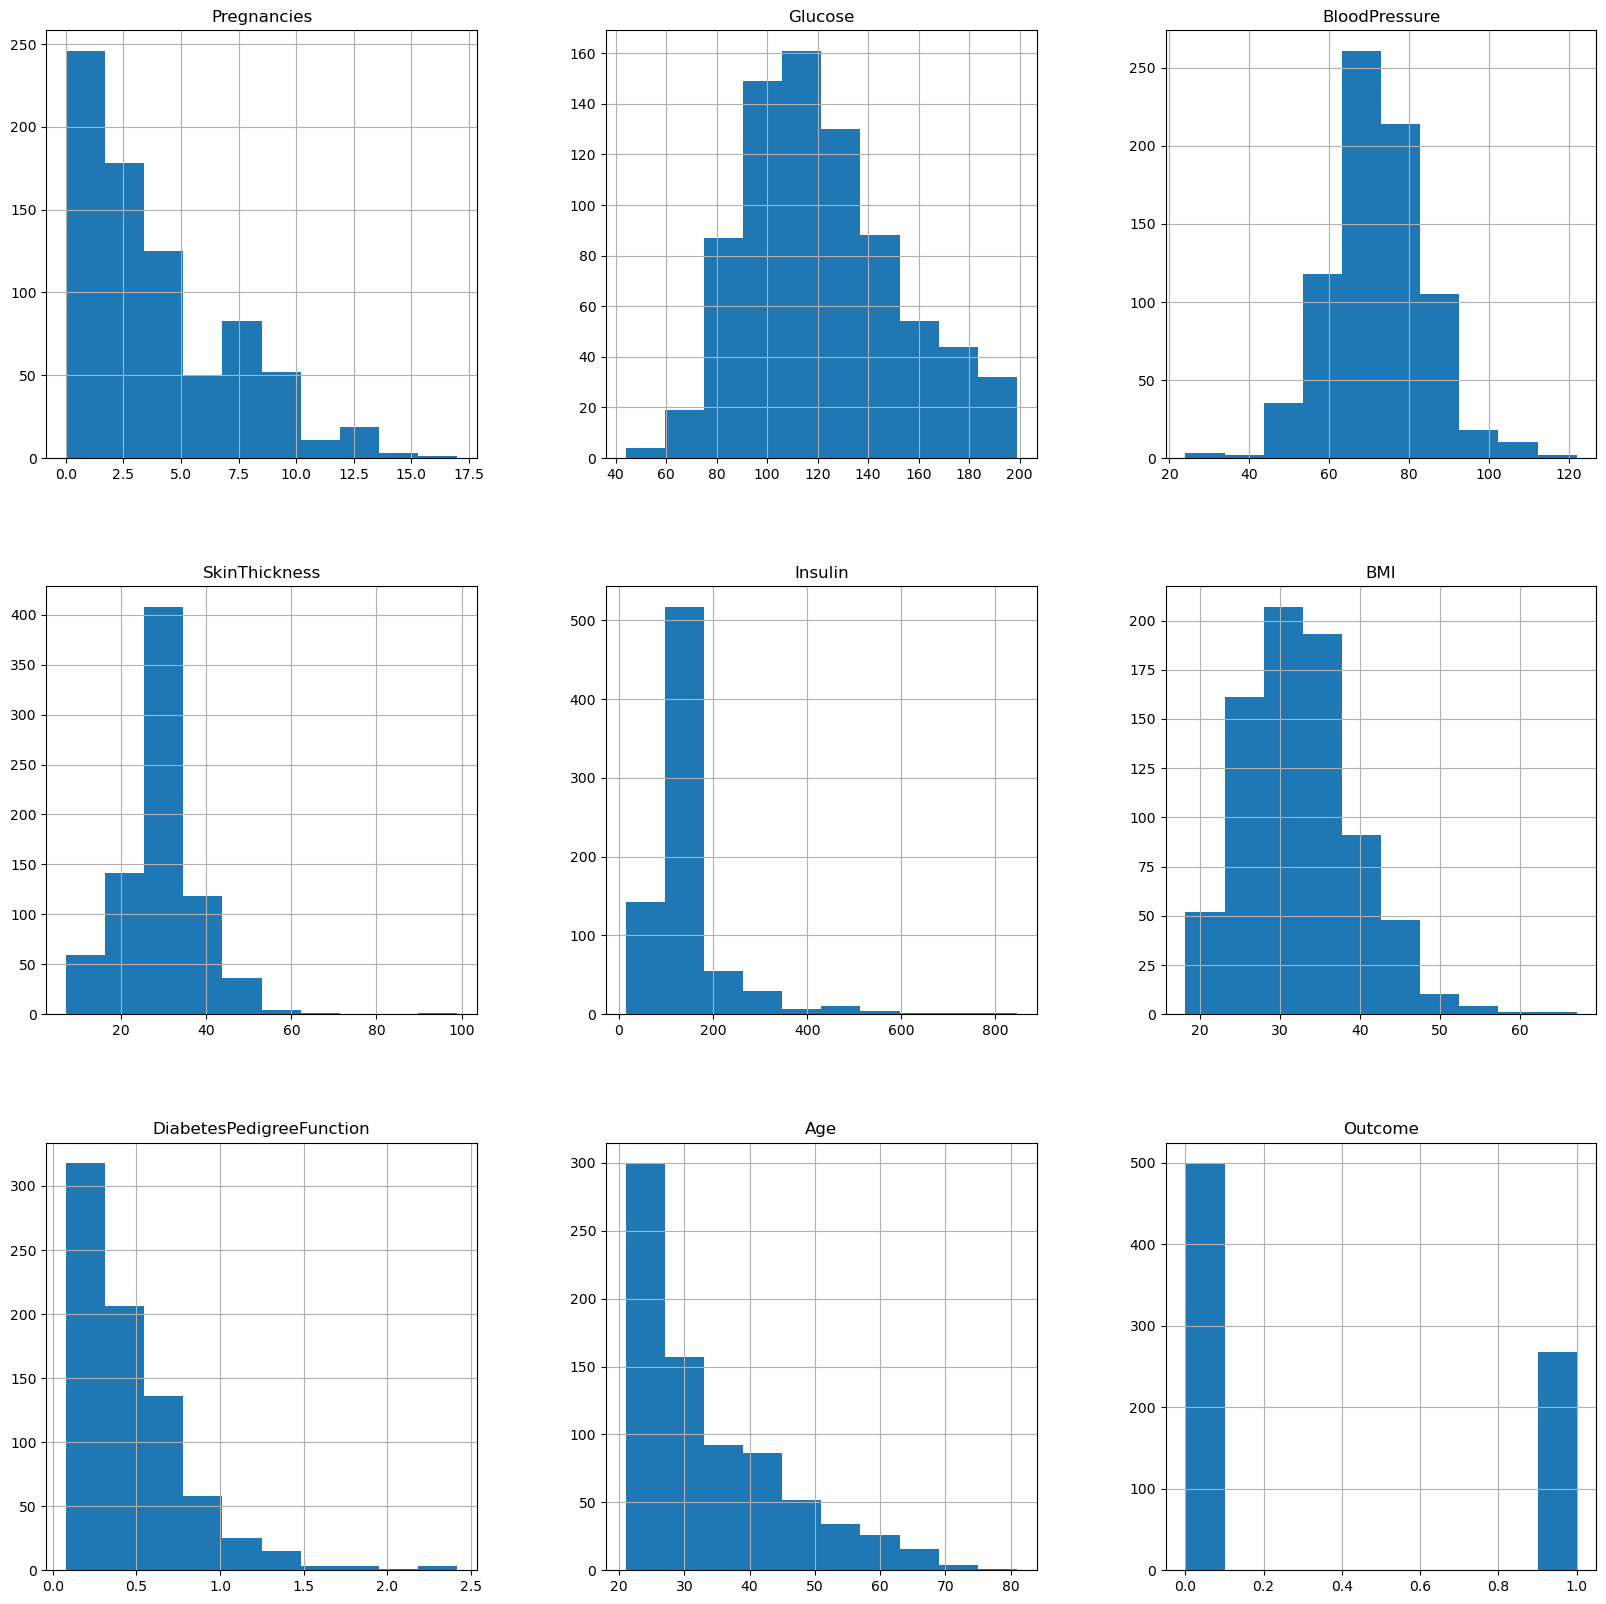

In [18]:
#Plotting the data distribution plots after removing null values
P = diabetes_df_copy.hist(figsize=(20,20))

Inference : Here,after removing the NULL value we can see  the clear difference in the visualizations. 
For example – In insulin column after removal of the null values, we can see that there is a spike at the range of 50 to 100 which is quite logical as well.

#### Plotting Null Count Analysis Plot

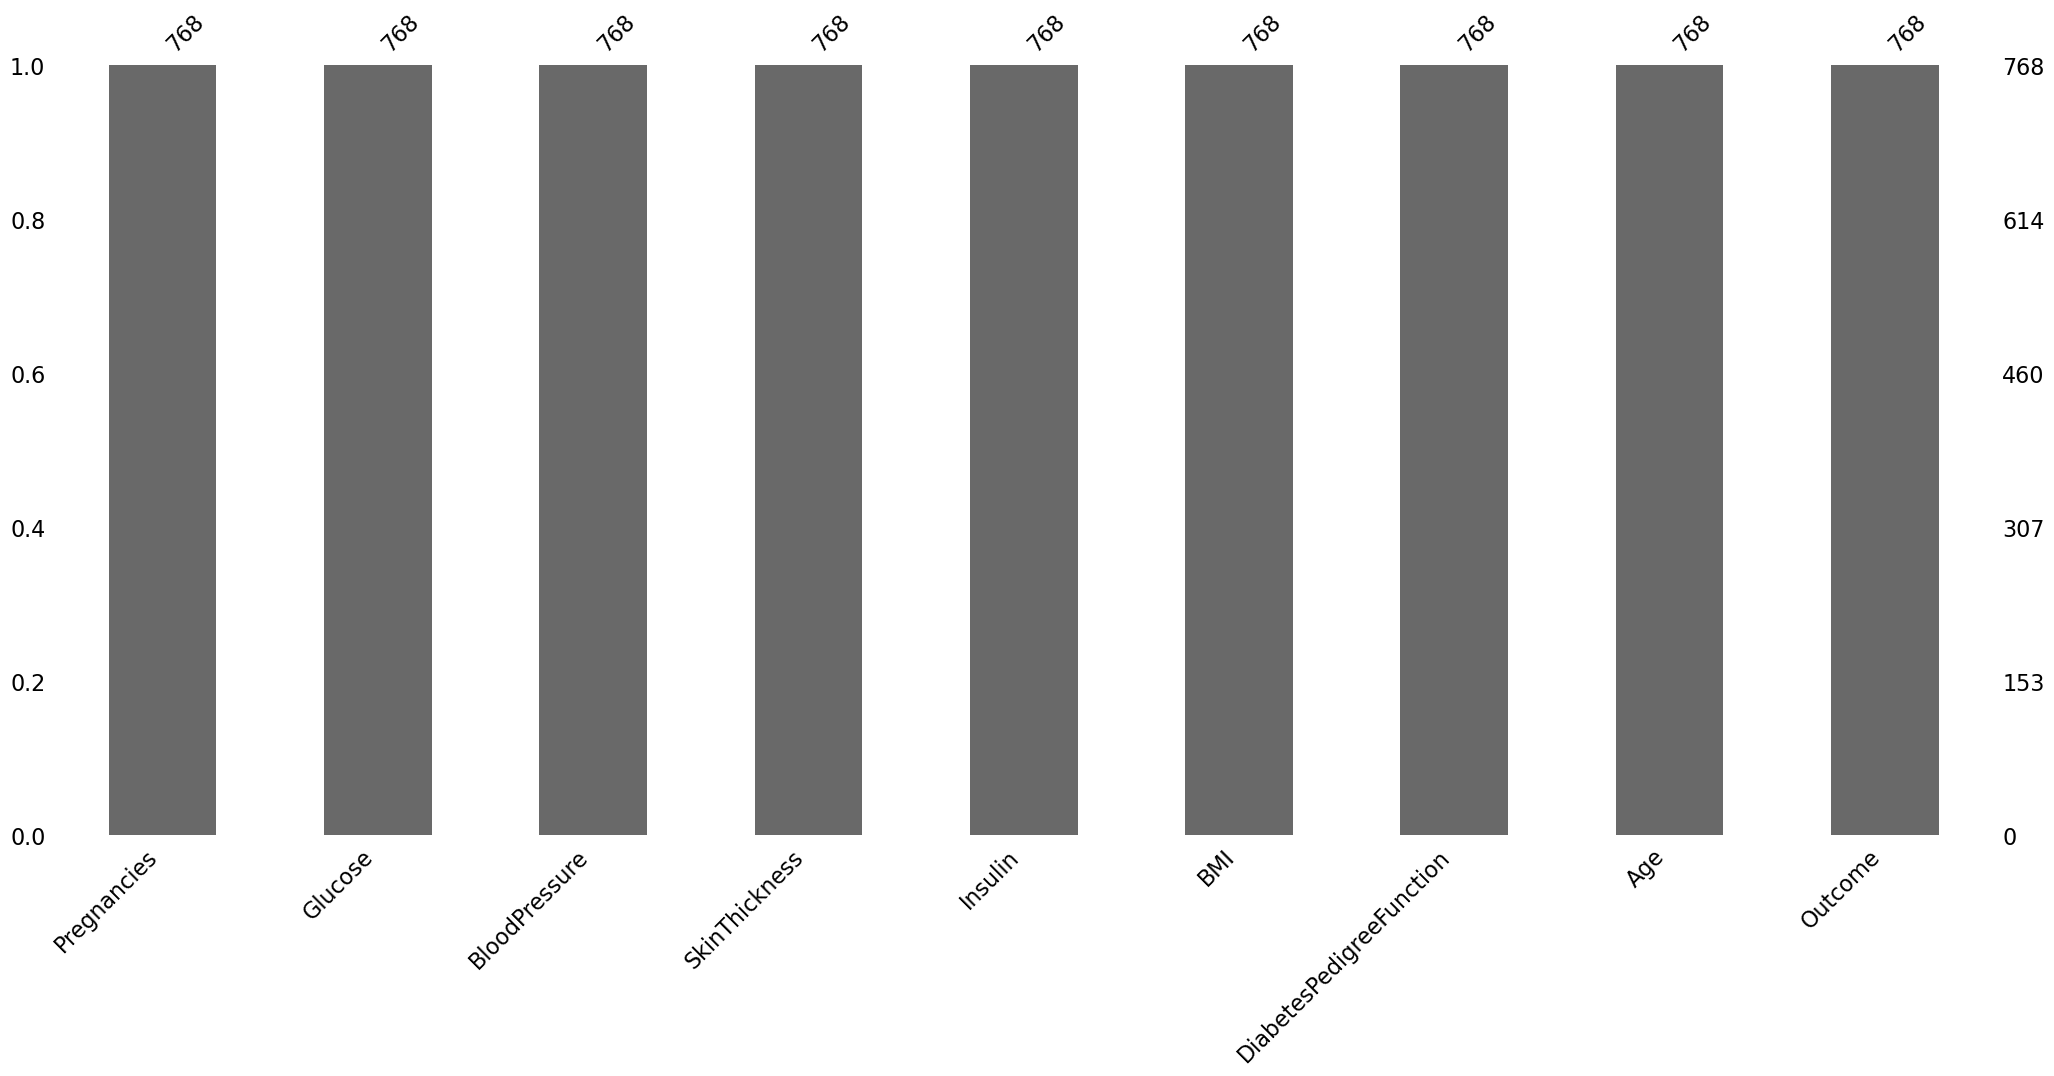

In [20]:
import missingno as msno
p = msno.bar(diabetes_df_copy)

Inference: Now in the above graph also we can clearly see that there are no null values in the dataset.

### 3.We observe integer as well as float data-type of variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

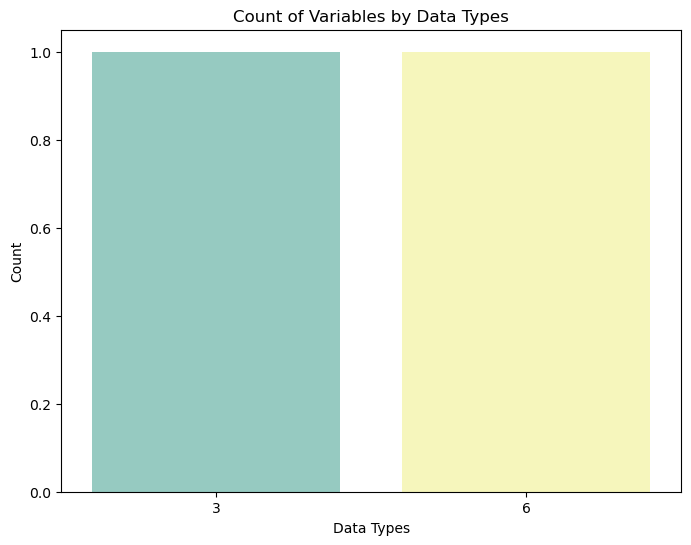

In [36]:
data_types = diabetes_df_copy.dtypes.value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(data=diabetes_df_copy, x=data_types, palette="Set3")
plt.xlabel('Data Types')
plt.ylabel('Count')
plt.title('Count of Variables by Data Types')
plt.show()

### 4.Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of actions.

In [31]:
##Now, let’s check that how well our outcome column is balanced
diabetes_df_copy['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

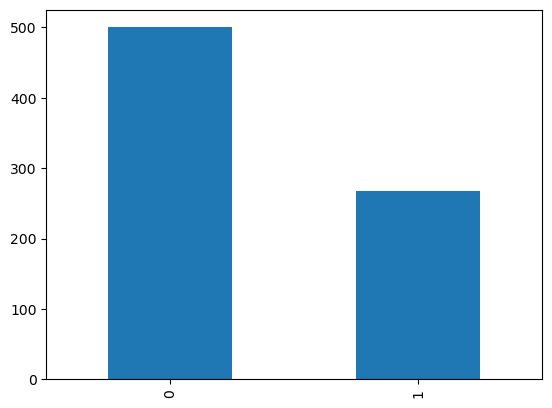

In [32]:
p=diabetes_df.Outcome.value_counts().plot(kind="bar")

Inference: Here from the above visualization it is clearly visible that our dataset is completely imbalanced in fact the number of patients who are diabetic is half of the patients who are non-diabetic.

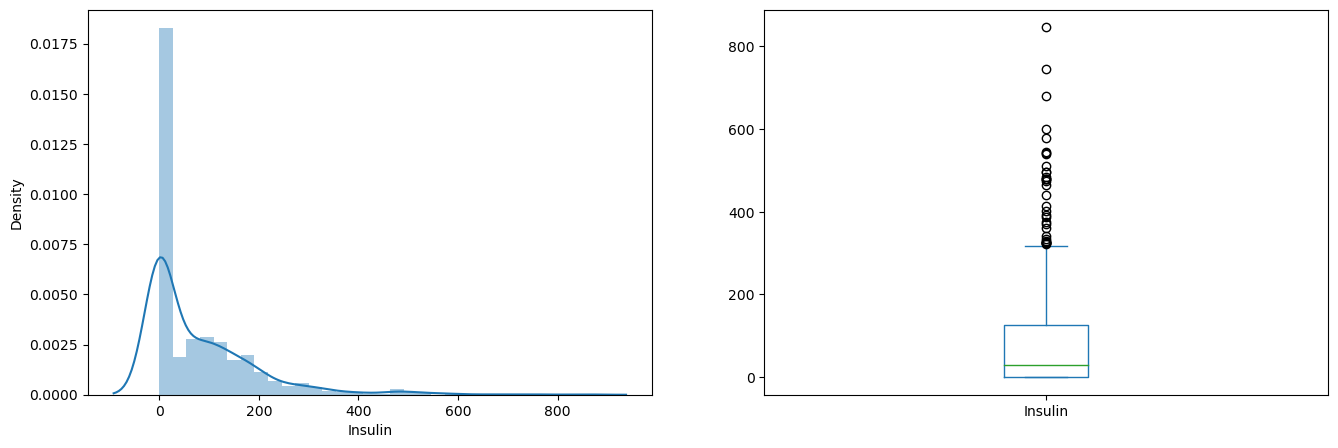

In [34]:
#Plot more graphs like boxplot ,distplot to enhance our analyzation
plt.subplot(121),sns.distplot(diabetes_df['Insulin'])
plt.subplot(122),diabetes_df['Insulin'].plot.box(figsize=(16,5))
plt.show()

Inference: That’s how Distplot can be helpful where one will able to see the distribution of the data as well as with the help of boxplot one can see the outliers in that column

### 5.Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

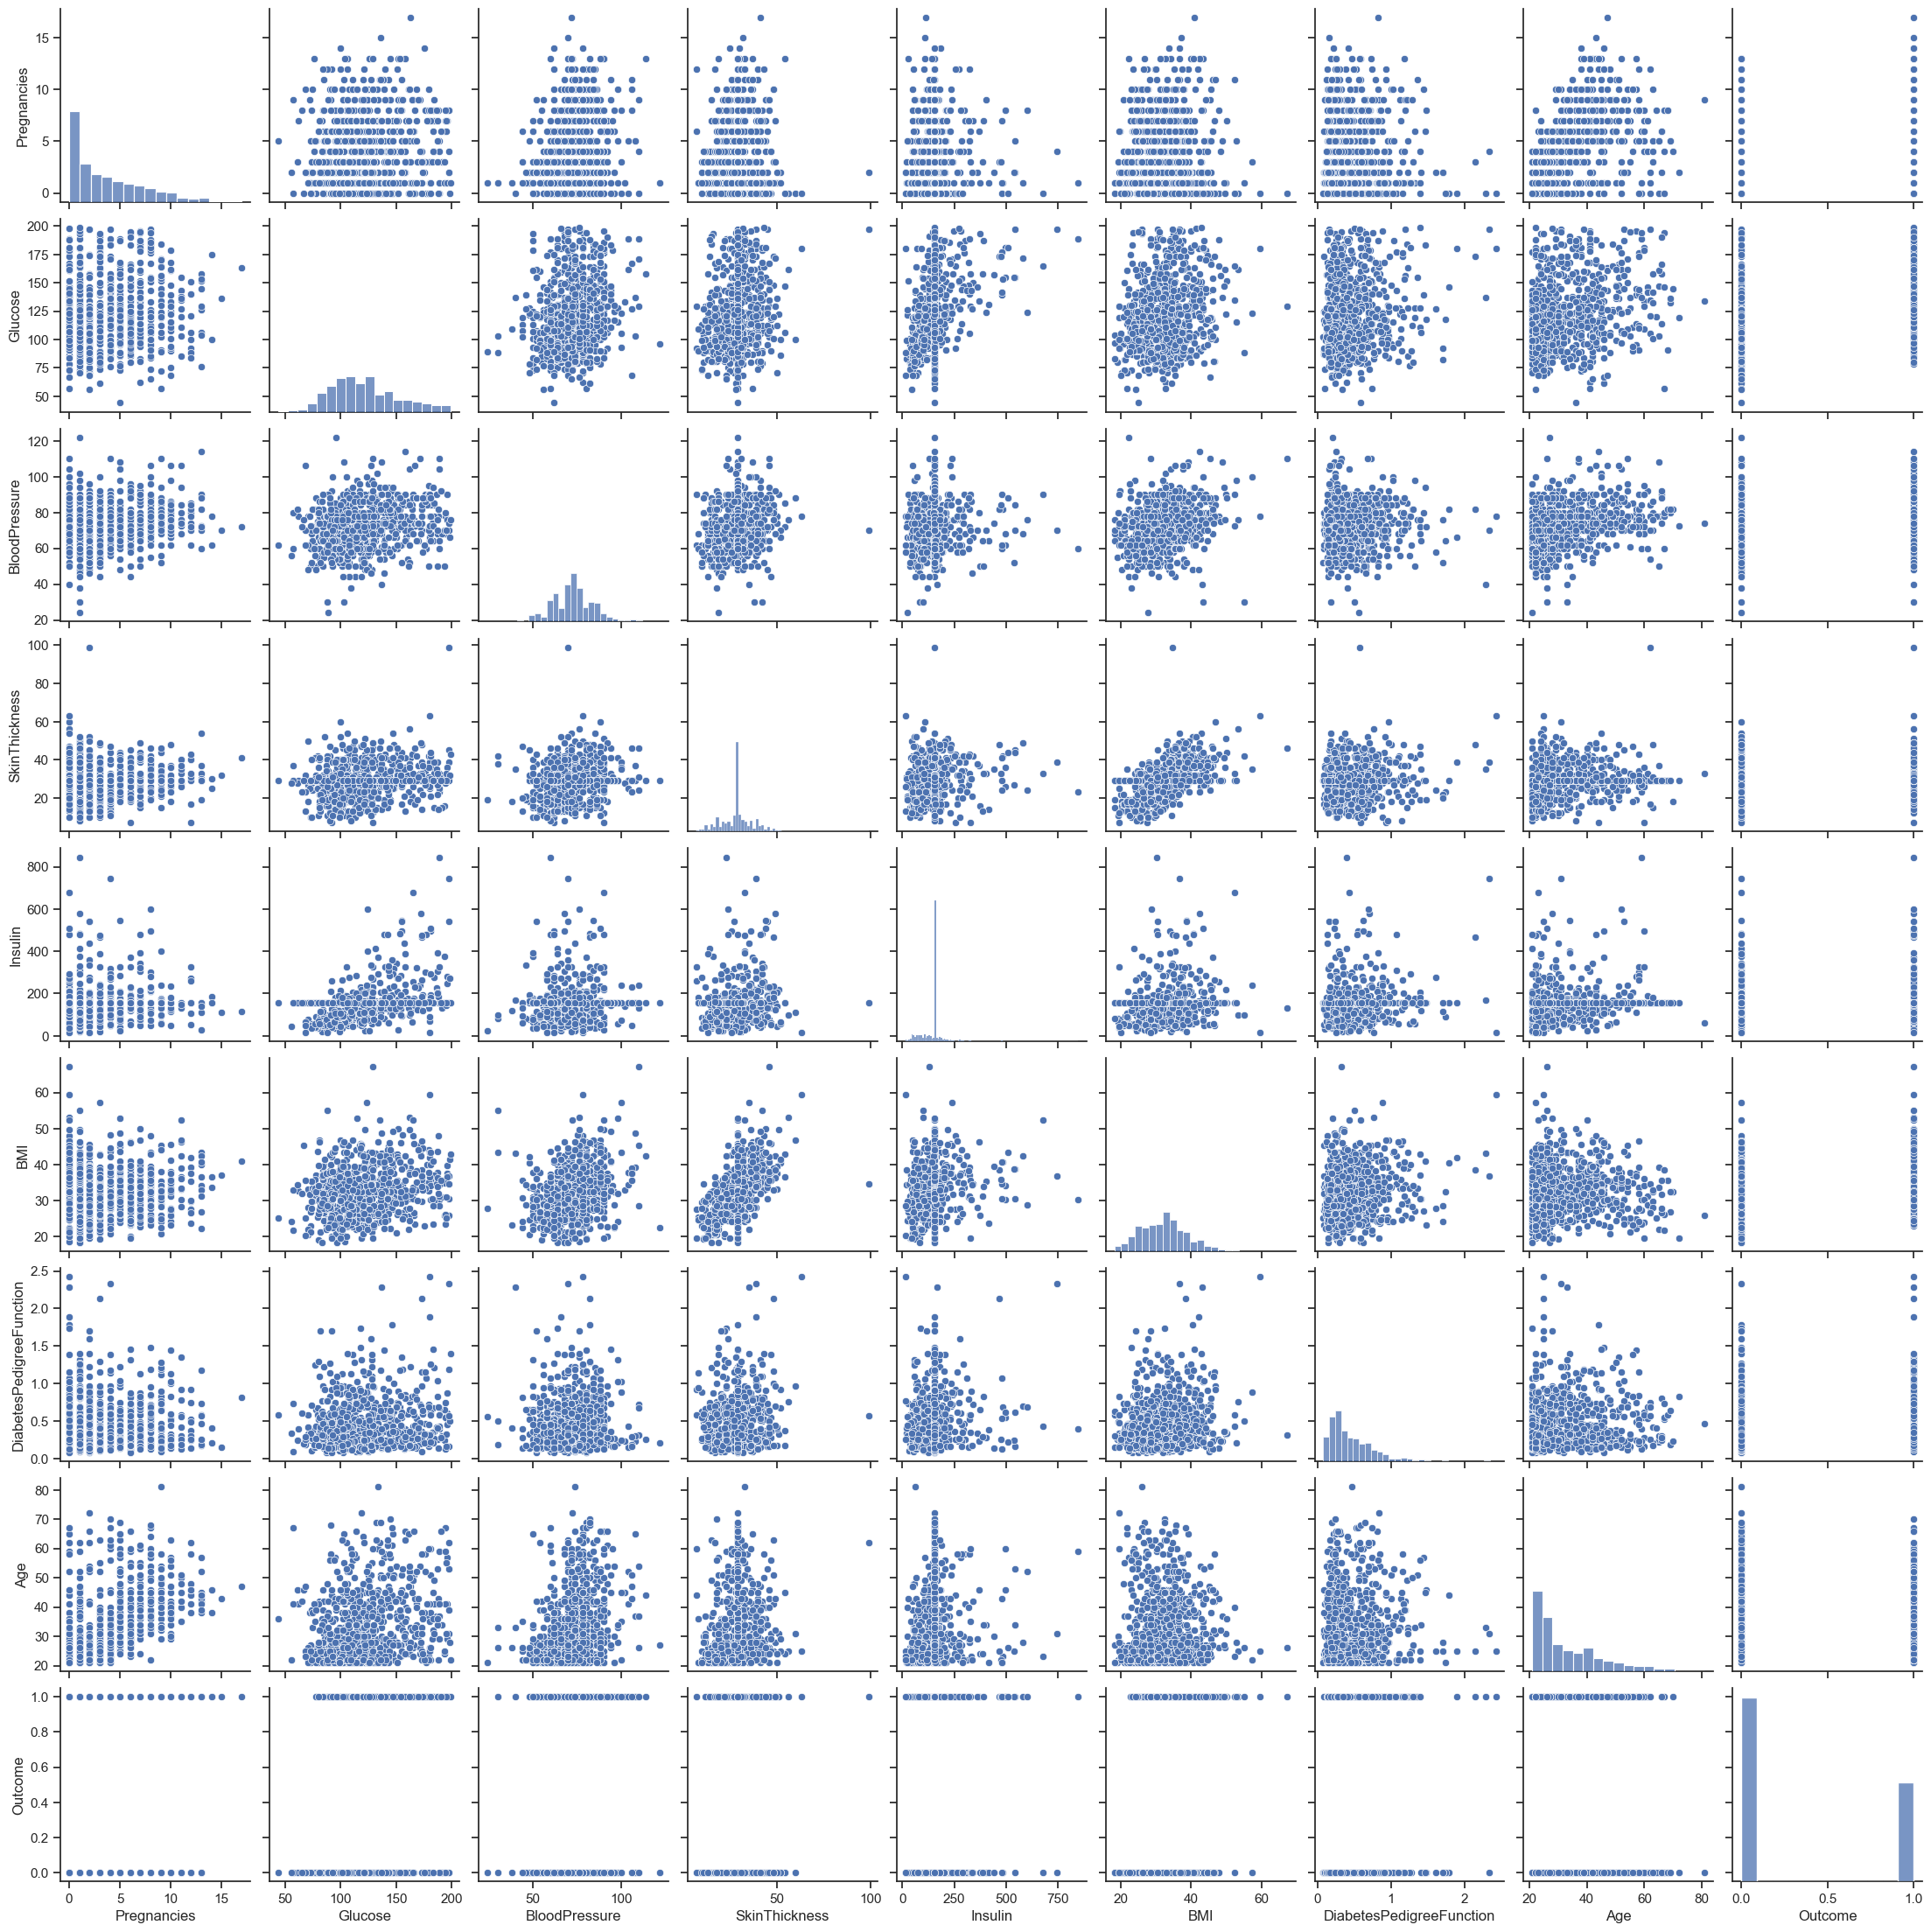

In [37]:
sns.set(style="ticks")
sns.pairplot(diabetes_df_copy)
plt.show()

Inference: here we can see that,data is imbalanced there are many outliers in the data,and they are non linearly distributed

### 6.	Perform correlation analysis. Visually explore it using a heat map.

### Correlation between all the features

##### Correlation between all the features before cleaning

<AxesSubplot:>

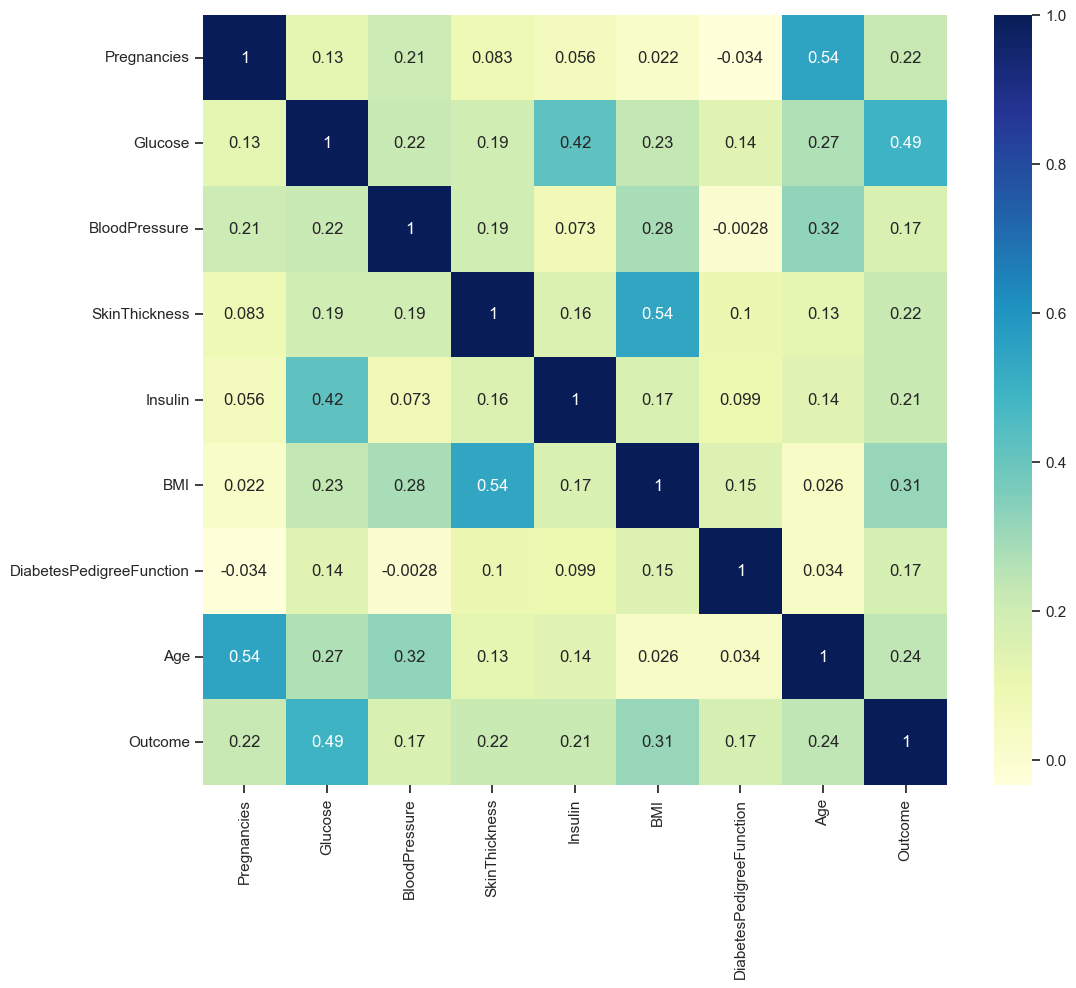

In [38]:
plt.figure(figsize=(12,10))
sns.heatmap(diabetes_df_copy.corr(),annot=True,cmap='YlGnBu')

### 7.	Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. Would Cross validation be useful in this scenario?

### Scaling the Data

In [39]:
#Before the scaling down the data
diabetes_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [40]:
#After the scaling down
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= pd.DataFrame(scaler.fit_transform(diabetes_df_copy.drop(['Outcome'],axis=1)),columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [41]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


Inference : we can see every value now is on the same scale which will help our ML model to give a better result.

In [42]:
#Target Column
diabetes_df_copy['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### 8.Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN.
### 9.	Create a classification report by analysing sensitivity, specificity, AUC(ROC curve) etc. Please try to be as descriptive as possible to explain what values of these parameter you settled for? any why?

### Model Building

##### Splitting the dataset

In [45]:
X = diabetes_df_copy.drop('Outcome', axis=1)
y = diabetes_df_copy['Outcome']

In [46]:
#Now we will split the data into training and testing data using the train_test_split function
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

### Random Forest

##### Building the model using Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [53]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
ytrain_predict=rfc.predict(X_train)
print("Accuracy_Score =", format(metrics.accuracy_score(y_train, ytrain_predict)))

Accuracy_Score = 1.0


In [61]:
print('RF train roc-auc : {}'.format(roc_auc_score(y_train,ytrain_predict)))

RF train roc-auc : 1.0


we can see that on the training dataset our model is overfitted.

In [51]:
predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7619047619047619


In [74]:
print('RF test roc-auc : {}'.format(roc_auc_score(y_test,predictions)))

RF test roc-auc : 0.6581632653061225


##### Classification report and confusion matrix of random forest model

In [92]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       147
           1       0.57      0.55      0.56        84

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



In [70]:
print("Confusion Matrix:" ,format(confusion_matrix(y_test, predictions)))

Confusion Matrix: [[124  23]
 [ 32  52]]


In [79]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc,X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.78 %
Standard Deviation: 6.19 %


### Decision Tree

##### Building the model using DecisionTree

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [73]:
predictions=dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.6883116883116883


In [75]:
print('dtree test roc-auc : {}'.format(roc_auc_score(y_test,predictions)))

dtree test roc-auc : 0.6581632653061225


In [76]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[113  34]
 [ 38  46]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       147
           1       0.57      0.55      0.56        84

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



In [80]:
accuracies = cross_val_score(estimator = dtree,X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 70.95 %
Standard Deviation: 5.70 %


### XgBoost classifier

##### Building model using XGBoost

In [82]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier(gamma=0)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [83]:
xgb_pred = xgb_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))

Accuracy Score = 0.7575757575757576


In [84]:
print(confusion_matrix(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))

[[117  30]
 [ 26  58]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       147
           1       0.66      0.69      0.67        84

    accuracy                           0.76       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



In [85]:
print('dtree test roc-auc : {}'.format(roc_auc_score(y_test,predictions)))
accuracies = cross_val_score(estimator = xgb_model,X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

dtree test roc-auc : 0.6581632653061225
Accuracy: 73.74 %
Standard Deviation: 7.03 %


### KNNClassifier

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)
ytrain_pred = knn_classifier.predict(X_train)
print('KNN train roc-auc : {}'.format(roc_auc_score(y_train,ytrain_pred)))
ytest_pred = knn_classifier.predict(X_test)
print('KNN test roc-auc : {}'.format(roc_auc_score(y_test,ytest_pred)))

KNN train roc-auc : 0.7663659317649958
KNN test roc-auc : 0.6632653061224489


In [103]:
print("Accuracy Score =", format(metrics.accuracy_score(y_test, ytest_pred)))

Accuracy Score = 0.7012987012987013


In [89]:
print(confusion_matrix(y_test,ytest_pred))
print(classification_report(y_test,ytest_pred))

[[118  29]
 [ 40  44]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       147
           1       0.60      0.52      0.56        84

    accuracy                           0.70       231
   macro avg       0.67      0.66      0.67       231
weighted avg       0.69      0.70      0.70       231



In [97]:
print('dtree test roc-auc : {}'.format(roc_auc_score(y_test,predictions)))
accuracies = cross_val_score(estimator = xgb_model,X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

dtree test roc-auc : 0.6581632653061225
Accuracy: 73.74 %
Standard Deviation: 7.03 %


### Support Vector Machine (SVM) 

##### Building the model using Support Vector Machine (SVM)

In [98]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [99]:
#Prediction from support vector machine model on the testing data
svc_pred = svc_model.predict(X_test)

In [100]:
print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7359307359307359


In [101]:
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[130  17]
 [ 44  40]]
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       147
           1       0.70      0.48      0.57        84

    accuracy                           0.74       231
   macro avg       0.72      0.68      0.69       231
weighted avg       0.73      0.74      0.72       231



In [102]:
print('dtree test roc-auc : {}'.format(roc_auc_score(y_test,svc_pred)))
accuracies = cross_val_score(estimator = svc_model,X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

dtree test roc-auc : 0.6802721088435374
Accuracy: 74.67 %
Standard Deviation: 3.92 %


### The Conclusion from Model Building

Therefore Random forest is the best model for this prediction since it has an accuracy_score of 0.76

### Feature Importance

Knowing about the feature importance is quite necessary as it shows that how much weightage each feature provides in the model building phase.

In [105]:
# Getting feature importances
rfc.feature_importances_

array([0.07401402, 0.2560787 , 0.08371356, 0.079715  , 0.08995591,
       0.15727585, 0.12275095, 0.13649602])

From the above output, it is not much clear that which feature is important for that reason we will now make a visualization of the same.

##### Plotting feature importances

<AxesSubplot:>

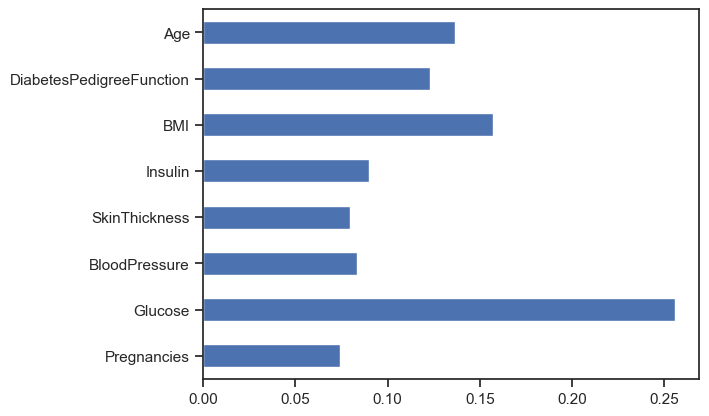

In [106]:
(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))

Here from the above graph, it is clearly visible that Glucose as a feature is the most important in this dataset.

### Saving Model – Random Forest

In [108]:
import pickle

# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)

# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)

# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test)

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [110]:
diabetes_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [111]:
diabetes_df_copy.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1
767,1,93.0,70.0,31.00000,155.548223,30.4,0.315,23,0


Putting data points in the model will either return 0 or 1 i.e. person suffering from diabetes or not.

In [112]:
rfc.predict([[0,137,40,35,168,43.1,2.228,33]]) #4th patient

array([1], dtype=int64)

In [113]:
rfc.predict([[10,101,76,48,180,32.9,0.171,63]])  # 763 th patient

array([0], dtype=int64)

### Conclusion

After using all these patient records, we are able to build a machine learning model (random forest – best one) to accurately predict whether or not the patients in the dataset have diabetes or not along with that we were able to draw some insights from the data via data analysis and visualization.

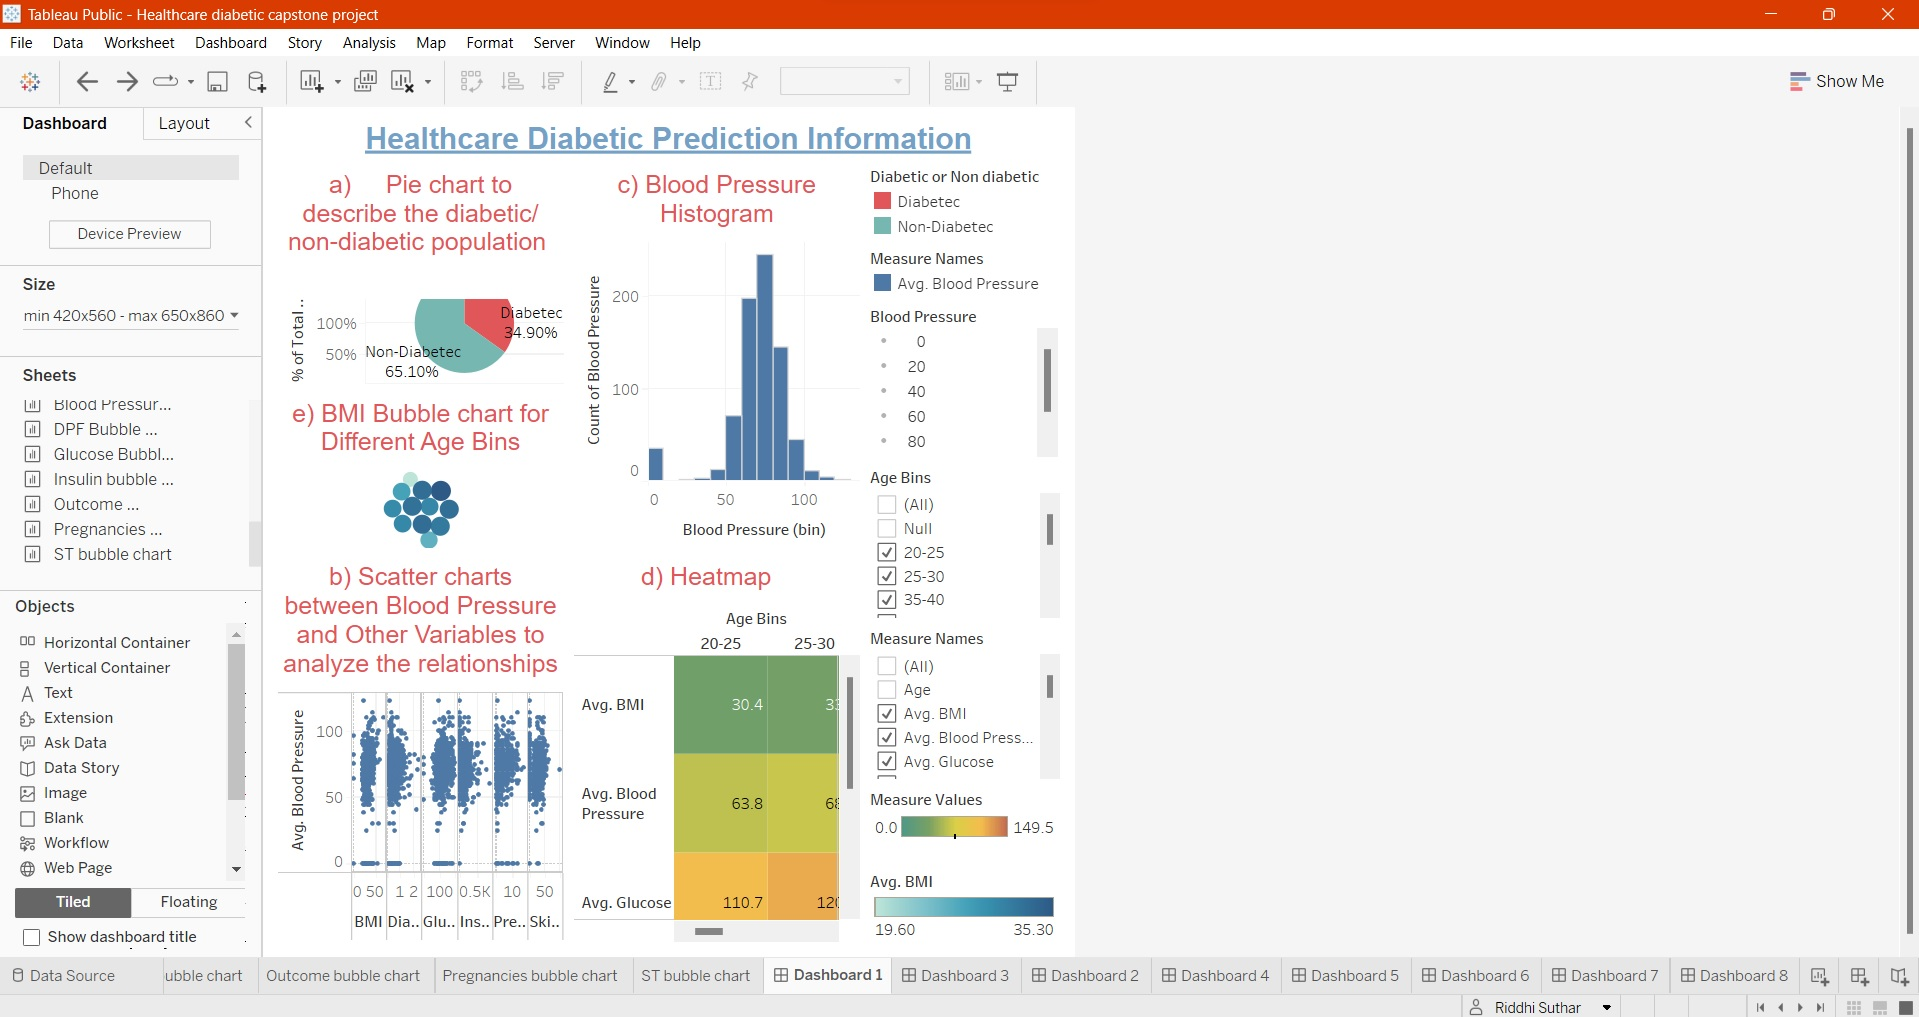

In [4]:
from IPython import display
display.Image("C:/Users/devan/Desktop/Healthcare diabetic capstone project.jpg")